In [2]:
# importing the dataset and containing dataframe!
import pandas as pd
df = pd.read_csv('customer_satisfaction_data.csv')

In [3]:
print(df.shape)

(800, 7)


In [10]:
print(df.dtypes)
print('df.dtypes', 'data types of each column')

CustomerID      int64
Age           float64
Gender         object
Location       object
Rating          int64
Category       object
Comment        object
dtype: object
df.dtypes data types of each column


In [11]:
#checking the data!
df.head()

,CustomerID,Age,Gender,Location,Rating,Category,Comment
0,6995,NaN,Female,Carrport,4,Product,"Good product overall, but room for improvement."
1,7800,22.0,Other,New Cynthia,1,Product,"Very poor product, needs significant improvement."
2,6134,49.0,Male,Gloverstad,1,Product,"Very poor product, needs significant improvement."
3,4607,63.0,Other,Peggyside,1,Product,"Very poor product, needs significant improvement."
4,3044,NaN,Other,Lisaside,4,Support,"Good support overall, but room for improvement."


In [12]:
#checking for nulls!
df.isnull().sum()

,0
CustomerID,0
Age,75
Gender,42
Location,39
Rating,0
Category,0
Comment,75


In [13]:
#Handling nulls!
df = df.fillna(value = {'Age': df['Age'].mean()})
df = df.fillna(value = {'Gender': df['Gender'].mode()[0]})
df = df.fillna(value = {'Location': df['Location'].mode()[0]})
df = df.fillna({'Comment': 'No Comment'})

In [14]:
#After cleaning!
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Location,0
Rating,0
Category,0
Comment,0


In [47]:
# Checking for duplicates!
df.duplicated().sum()

0

In [15]:
# Statistics of the data!
df.describe()

,CustomerID,Age,Rating
count,800.000000,800.000000,800.000000
mean,5567.483750,44.376552,3.011250
std,2555.157363,14.651146,1.404845
min,1002.000000,18.000000,1.000000
25%,3405.250000,33.000000,2.000000
50%,5521.000000,44.376552,3.000000
75%,7793.250000,56.250000,4.000000
max,9997.000000,70.000000,5.000000


In [ ]:
# Grouping by Category and calculating descriptive statistics
category_stats = df.groupby('Category')['Rating'].describe()

# Grouping by Gender and calculating descriptive statistics
gender_stats = df.groupby('Gender')['Rating'].describe()

print("Descriptive Statistics by Category:\n", category_stats)
print("\nDescriptive Statistics by Gender:\n", gender_stats)


Descriptive Statistics by Category:
           count      mean       std  min  25%  50%  75%  max
Category                                                    
Delivery  193.0  3.077720  1.417587  1.0  2.0  3.0  4.0  5.0
Product   188.0  2.989362  1.360204  1.0  2.0  3.0  4.0  5.0
Service   195.0  3.112821  1.452900  1.0  2.0  3.0  4.0  5.0
Support   224.0  2.883929  1.386970  1.0  2.0  3.0  4.0  5.0

Descriptive Statistics by Gender:
         count      mean       std  min  25%  50%  75%  max
Gender                                                    
Female  304.0  3.128289  1.404844  1.0  2.0  3.0  4.0  5.0
Male    260.0  2.907692  1.391902  1.0  2.0  3.0  4.0  5.0
Other   236.0  2.974576  1.413984  1.0  2.0  3.0  4.0  5.0


In [33]:
# Group by location and calculate average rating
location_ratings = df.groupby('Location')['Rating'].mean()

# Find the location with the highest average rating
most_satisfied_location = location_ratings.idxmax()

# Print the result
print(f"The country with the highest average satisfaction rating is: {most_satisfied_location}")



The country with the highest average satisfaction rating is: Adamland


In [17]:
# Download stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Example text
text = "This is an example sentence demonstrating stopword removal."

# Tokenize text
words = word_tokenize(text)

# Remove stopwords
filtered_words = [word for word in words if word.lower() not in stop_words]

print(filtered_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['example', 'sentence', 'demonstrating', 'stopword', 'removal', '.']


In [18]:
# Importing Sentiment Analyzer!
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [24]:
#Running the polarity score on data!
from tqdm.notebook import tqdm
res = {}
for i, row in tqdm(df.iterrows()):
  text = row['Comment']
  myid = row['CustomerID']
  text = str(row['Comment'])
  res[myid] = sia.polarity_scores(text)

0it [00:00, ?it/s]

In [25]:
# Result of running Sentiment Analyzer
# 0 = neutral, closer to 1 = positve, closer to -1 = negative, compund = avg
res

{6995: {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'compound': 0.714},
 7800: {'neg': 0.303, 'neu': 0.268, 'pos': 0.429, 'compound': 0.1045},
 6134: {'neg': 0.303, 'neu': 0.268, 'pos': 0.429, 'compound': 0.1045},
 4607: {'neg': 0.303, 'neu': 0.268, 'pos': 0.429, 'compound': 0.1045},
 3044: {'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.7783},
 5036: {'neg': 0.368, 'neu': 0.632, 'pos': 0.0, 'compound': -0.3252},
 6194: {'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.3089},
 6265: {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'compound': 0.714},
 1036: {'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.3089},
 2298: {'neg': 0.29, 'neu': 0.374, 'pos': 0.336, 'compound': 0.0946},
 9476: {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'compound': 0.714},
 7663: {'neg': 0.303, 'neu': 0.268, 'pos': 0.429, 'compound': 0.1045},
 7765: {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'compound': 0.714},
 7130: {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296},
 3423: {'neg': 0.0, 'neu':

In [21]:
pd.DataFrame(res).T

,neg,neu,pos,compound
6995,0.000,0.457,0.543,0.7140
7800,0.303,0.268,0.429,0.1045
6134,0.303,0.268,0.429,0.1045
4607,0.303,0.268,0.429,0.1045
3044,0.000,0.339,0.661,0.7783
...,...,...,...,...
3621,0.000,0.297,0.703,0.7955
5787,0.429,0.571,0.000,-0.3089
3532,0.303,0.268,0.429,0.1045
7684,0.000,0.457,0.543,0.7140


In [26]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index': 'CustomerID'})
vaders = vaders.merge(df, how = 'left')

In [27]:
vaders.head()

,CustomerID,neg,neu,pos,compound,Age,Gender,Location,Rating,Category,Comment
0,6995,0.000,0.457,0.543,0.7140,44.376552,Female,Carrport,4,Product,"Good product overall, but room for improvement."
1,7800,0.303,0.268,0.429,0.1045,22.000000,Other,New Cynthia,1,Product,"Very poor product, needs significant improvement."
2,6134,0.303,0.268,0.429,0.1045,49.000000,Male,Gloverstad,1,Product,"Very poor product, needs significant improvement."
3,4607,0.303,0.268,0.429,0.1045,63.000000,Other,Peggyside,1,Product,"Very poor product, needs significant improvement."
4,3044,0.000,0.339,0.661,0.7783,44.376552,Other,Lisaside,4,Support,"Good support overall, but room for improvement."


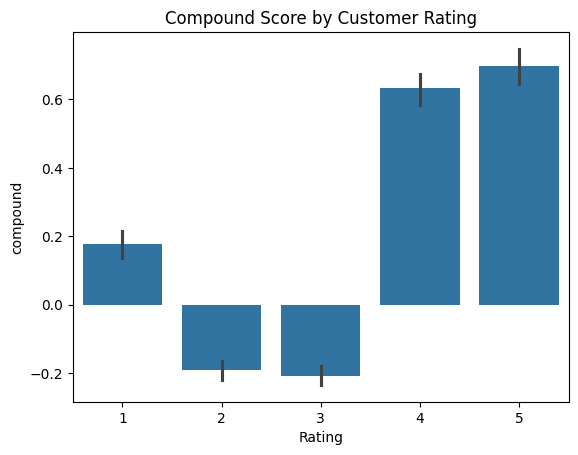

In [28]:
# Comparing Compound Score by rating to check whether it matches or not!
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(data = vaders, x = 'Rating', y = 'compound')
ax.set_title('Compound Score by Customer Rating')
plt.show()

It verifies that higher the rating, the higher the compund score in positive. It means that Sentiment Analyzer has sentimented correctly.
There is some irregularity because of data as you can see for the 1 value.

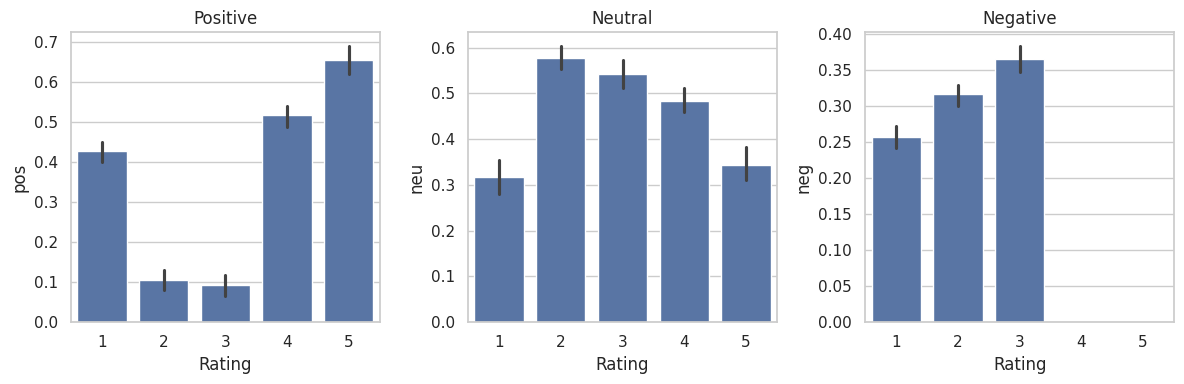

In [ ]:
# Comparing different ratings!
fig,axes_style = plt.subplots(1,3, figsize = (12,4))
sns.barplot(data = vaders, x = 'Rating', y = 'pos', ax = axes_style[0])
sns.barplot(data = vaders, x = 'Rating', y = 'neu', ax = axes_style[1])
sns.barplot(data = vaders, x = 'Rating', y = 'neg', ax = axes_style[2])
axes_style[0].set_title('Positive')
axes_style[1].set_title('Neutral')
axes_style[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [30]:
#checking distribution of rating across categories!
rating_distribution = df.groupby(['Category','Rating']).size().unstack(fill_value=0)
rating_distribution = rating_distribution.apply(lambda x: x/x.sum(), axis=1)
print("\nRating Distribution across Categories:\n", rating_distribution)


Rating Distribution across Categories:
 Rating           1         2         3         4         5
Category                                                  
Delivery  0.186528  0.186528  0.207254  0.202073  0.217617
Product   0.180851  0.207447  0.228723  0.207447  0.175532
Service   0.194872  0.184615  0.164103  0.225641  0.230769
Support   0.205357  0.241071  0.183036  0.205357  0.165179


Text(0.5, 1.0, 'Avg.Satisfaction scores acorss Categories')

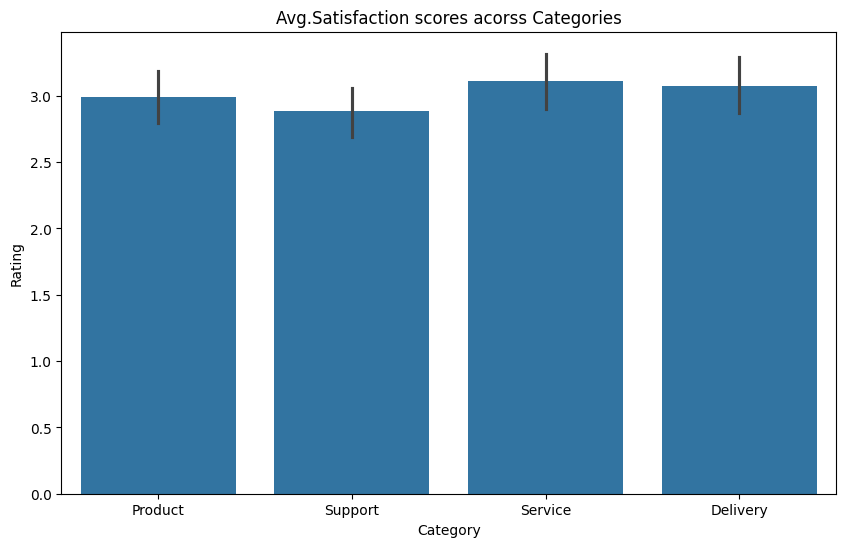

In [ ]:
# barplot of rating distribution across categories!
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Category', y='Rating')
plt.title('Avg.Satisfaction scores acorss Categories')

Key Points:

- Service has the highest average satisfaction score, slightly above 3.
- Delivery and Product have similar scores, slightly below the Service category.
- Support has the lowest average score among the four categories, but it’s still relatively close to the others.

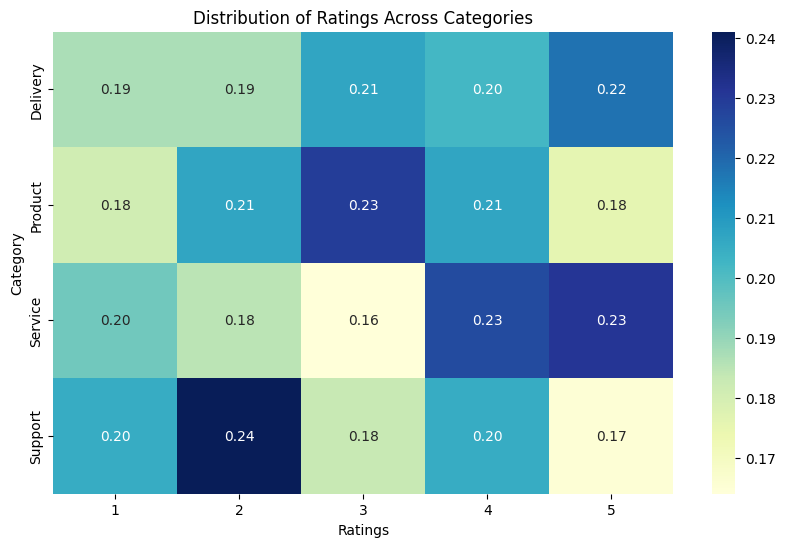

In [31]:
# Round the values for better readability
rating_distribution_rounded = rating_distribution.round(3)

# Setting 'Category' as the index
if 'Category' in rating_distribution_rounded.columns:
    rating_distribution_rounded.set_index('Category', inplace=True)

# Step 6: Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(rating_distribution_rounded, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Distribution of Ratings Across Categories")
plt.xlabel("Ratings")
plt.ylabel("Category")
plt.show()

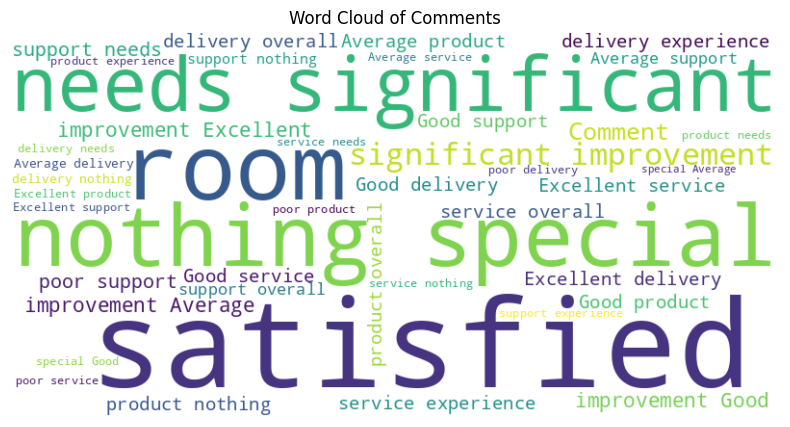

In [32]:
#creating a word plot
from wordcloud import WordCloud
all_comments = ' '.join(df['Comment'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

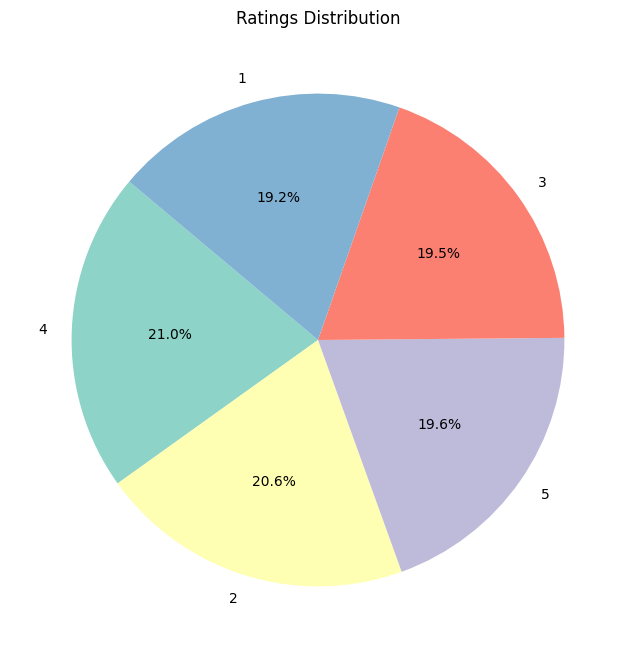

In [ ]:
# Pie-chart for rating distribution!
rating_counts = df['Rating'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title("Ratings Distribution")
plt.show()


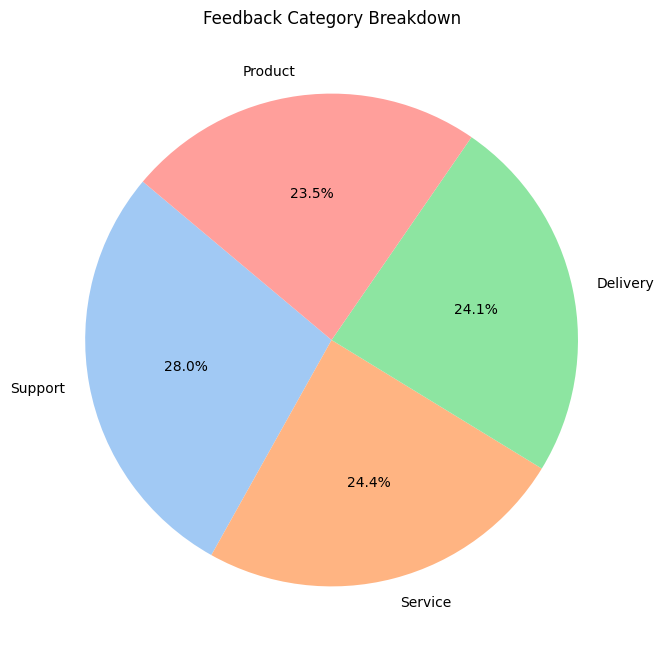

In [ ]:
# Assuming 'Category' is a column in your DataFrame
category_counts = df['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Feedback Category Breakdown")
plt.show()


The majority of customer attention seems to be focused on "Support," followed closely by "Service" and "Delivery." This could suggest that while the product itself might be satisfactory, the way it's delivered and the support around it are crucial to customer satisfaction.

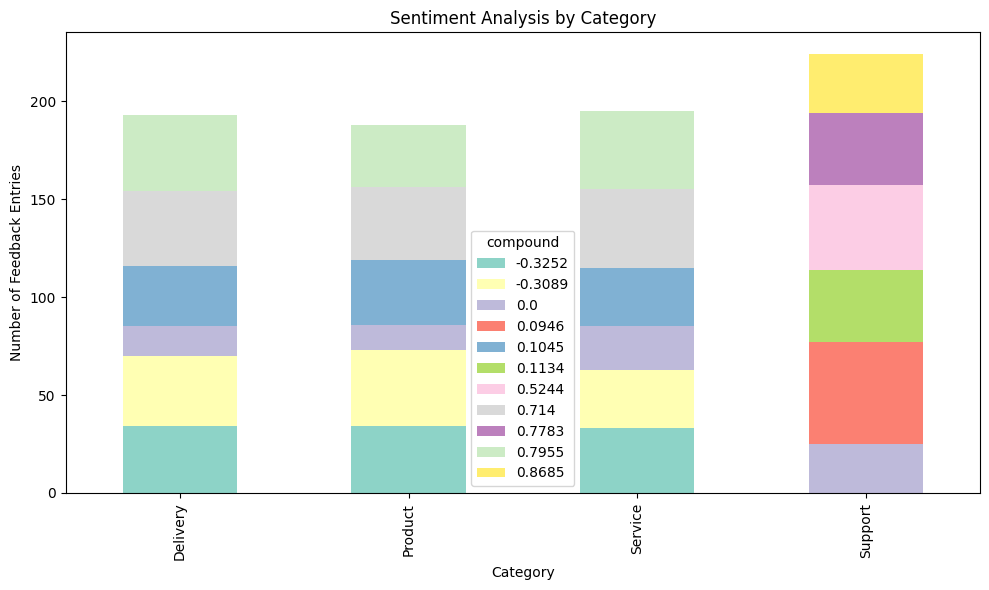

In [ ]:
category_sentiment = vaders.groupby(['Category', 'compound']).size().unstack().fillna(0)

# Plotting the stacked bar chart
category_sentiment.plot(kind='bar', stacked=True, colormap='Set3', figsize=(10, 6))
plt.title('Sentiment Analysis by Category')
plt.ylabel('Number of Feedback Entries')
plt.tight_layout()
plt.show()

The Support category appears to have the most polarizing feedback, This indicates that feedback for support is generally positive.

Delivery, Product, and Service categories have a broader range of sentiment scores, including both neutral and moderately positive feedback. This suggests that while feedback is generally negative, there is some variation in customer experiences across these categories, showcasing the need for improvement in these areas.

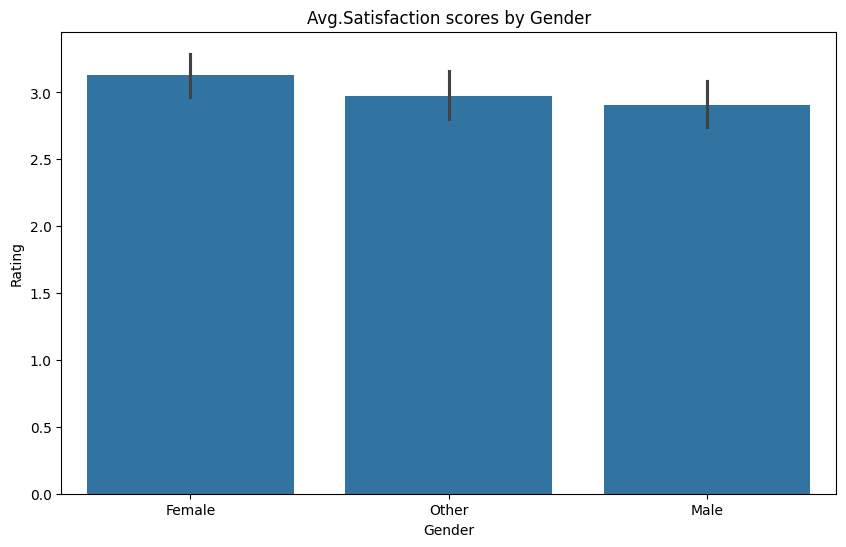

In [ ]:
# Satisfaction Scores by Gender!
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Gender', y='Rating')
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.title('Avg.Satisfaction scores by Gender')
plt.show()

The visualization indicates that, on average, female customers reported higher satisfaction scores compared to male customers. This observation suggests that there might be differences in how these genders experience the company products or services.

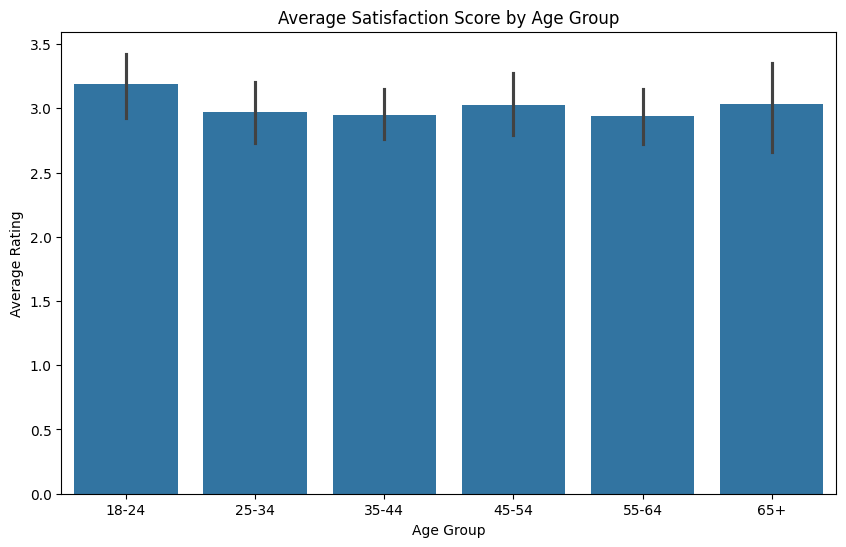

In [ ]:
# Grouping age and creating barplot!
df['Age Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 100],
                        labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age Group', y='Rating')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.title('Average Satisfaction Score by Age Group')
plt.show()

The satisfaction scores across all age groups are fairly consistent, with no significant outliers. The 18-24 age group might be the most satisfied demographic, while the satisfaction levels of the other groups are more uniform. The error bars show some variability, particularly in the younger and older groups, indicating more diverse opinions within these demographics.